In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df=pd.read_csv("Loan.csv")

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [56]:
df.shape


(614, 13)

In [57]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_boxplots_histograms(data, variables):
    plt.figure(figsize=(15, 8))
    
    for i, variable in enumerate(variables, 1):
        plt.subplot(2, len(variables), i)
        sns.boxplot(x=data[variable])
        plt.title(f'Boxplot for {variable}')

        plt.subplot(2, len(variables), len(variables) + i)
        sns.histplot(data[variable], kde=True, bins=20, color='skyblue')
        plt.title(f'Histogram for {variable}')
    
    plt.tight_layout()
    plt.show()

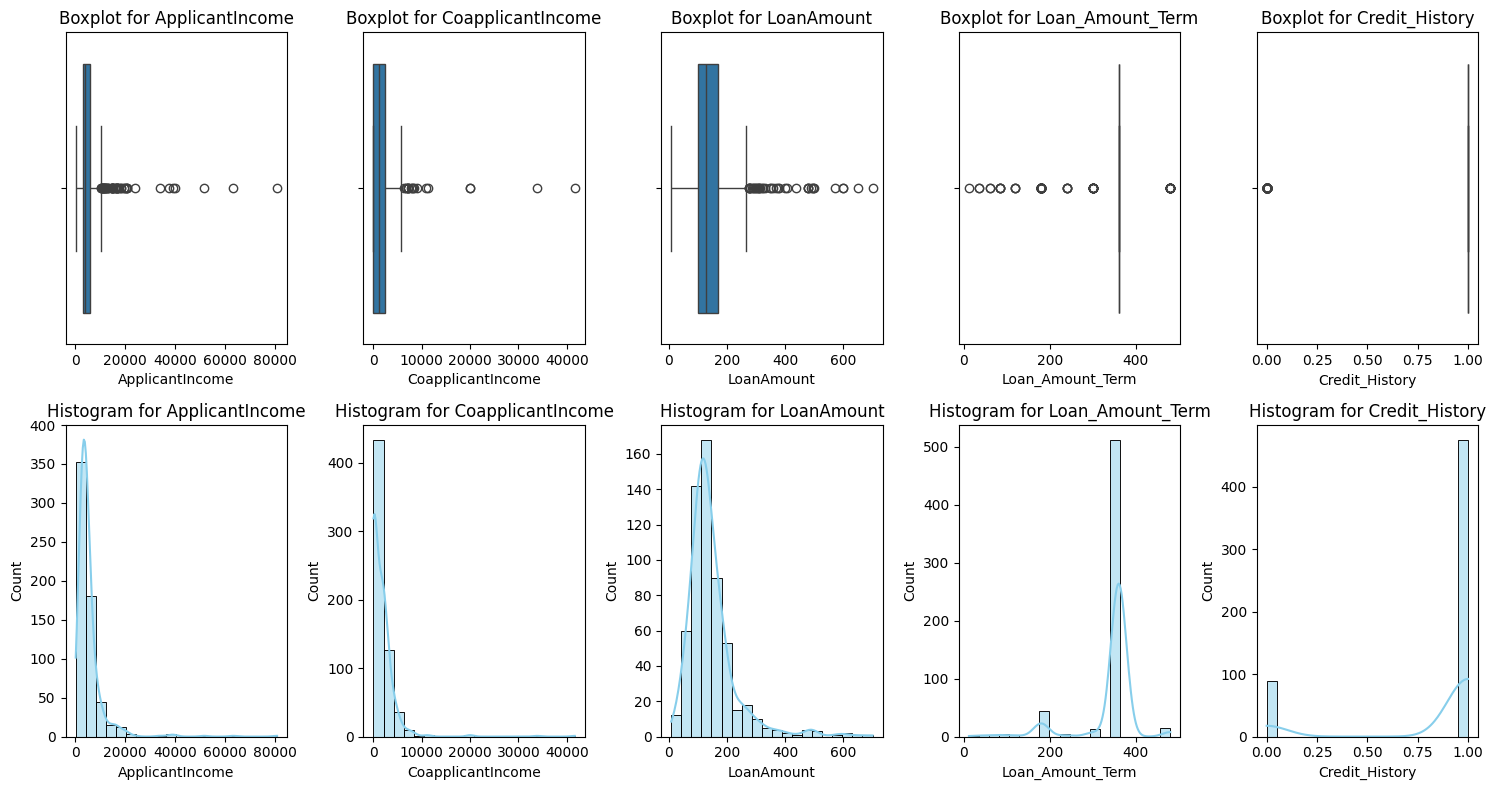

In [60]:
variable_list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Call the function for both boxplots and histograms
create_boxplots_histograms(df, variable_list)

In [61]:
logtrans=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for variable in logtrans:
    df[f'{variable}_log']=np.log1p(df[variable])

In [62]:
df.isnull().sum()

Loan_ID                   0
Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed            32
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term         14
Credit_History           50
Property_Area             0
Loan_Status               0
ApplicantIncome_log       0
CoapplicantIncome_log     0
LoanAmount_log           22
dtype: int64

In [63]:
categorical = df.select_dtypes(include=['object'])

In [64]:
for i in categorical:
    df[i]=df[i].fillna(df[i].mode().iloc[0])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 614 non-null    object 
 2   Married                614 non-null    object 
 3   Dependents             614 non-null    object 
 4   Education              614 non-null    object 
 5   Self_Employed          614 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             592 non-null    float64
 9   Loan_Amount_Term       600 non-null    float64
 10  Credit_History         564 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  ApplicantIncome_log    614 non-null    float64
 14  CoapplicantIncome_log  614 non-null    float64
 15  LoanAm

In [66]:
numerical = df.select_dtypes(include=['float64', 'int64'])

In [67]:
numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,5849,0.0,NaN,360.0,1.0,8.674197,0.000000,NaN
1,4583,1508.0,128.0,360.0,1.0,8.430327,7.319202,4.859812
2,3000,0.0,66.0,360.0,1.0,8.006701,0.000000,4.204693
3,2583,2358.0,120.0,360.0,1.0,7.857094,7.765993,4.795791
4,6000,0.0,141.0,360.0,1.0,8.699681,0.000000,4.955827


In [68]:
numerical.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'ApplicantIncome_log',
       'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [69]:
for i in numerical:
    df[i]=df[i].fillna(df[i].mean())

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                614 non-null    object 
 1   Gender                 614 non-null    object 
 2   Married                614 non-null    object 
 3   Dependents             614 non-null    object 
 4   Education              614 non-null    object 
 5   Self_Employed          614 non-null    object 
 6   ApplicantIncome        614 non-null    int64  
 7   CoapplicantIncome      614 non-null    float64
 8   LoanAmount             614 non-null    float64
 9   Loan_Amount_Term       614 non-null    float64
 10  Credit_History         614 non-null    float64
 11  Property_Area          614 non-null    object 
 12  Loan_Status            614 non-null    object 
 13  ApplicantIncome_log    614 non-null    float64
 14  CoapplicantIncome_log  614 non-null    float64
 15  LoanAm

In [71]:
X = df.drop(['Loan_ID','Loan_Status'], axis=1)

In [72]:
y=df['Loan_Status']

In [73]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [74]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest= train_test_split(X,y, test_size=0.2,random_state=0)

In [75]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()

In [76]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,8.674197,0.000000,4.866325
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,8.430327,7.319202,4.859812
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,8.006701,0.000000,4.204693
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,7.857094,7.765993,4.795791
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,8.699681,0.000000,4.955827


In [77]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [78]:
encode= ['Gender', 'Married','Education','Self_Employed','Property_Area']

In [79]:
Xtrain['Dependents'] = Xtrain['Dependents'].replace('3+', 3)

In [80]:
for column in encode:
    Xtrain[column] = labelencoder_x.fit_transform(Xtrain[column])

In [81]:
Xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
90,1,1,0,0,0,2958,2900.0,131.0,360.0,1.000000,1,7.992607,7.972811,4.882802
533,1,0,1,0,0,11250,0.0,196.0,360.0,0.842199,1,9.328212,0.000000,5.283204
452,1,1,0,0,0,3948,1733.0,149.0,360.0,0.000000,0,8.281218,7.458186,5.010635
355,0,0,0,0,0,3813,0.0,116.0,180.0,1.000000,2,8.246434,0.000000,4.762174
266,1,1,2,0,0,4708,1387.0,150.0,360.0,1.000000,1,8.457231,7.235619,5.017280


In [82]:
labelencode_y= LabelEncoder()
ytrain=labelencode_y.fit_transform(ytrain)

In [83]:
ytrain

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [84]:
for column in encode:
    Xtest[column] = labelencoder_x.fit_transform(Xtest[column])

ytest=labelencode_y.fit_transform(ytest)

In [85]:
Xtest['Dependents'] = Xtest['Dependents'].replace('3+', 3)

In [86]:
for column in Xtest.columns:
    if Xtest[column].dtype == 'object':
        Xtest[column] = pd.to_numeric(Xtest[column], errors='coerce')
        median_value = Xtest[column].median()
        Xtest[column]=Xtest[column].fillna(median_value)

In [87]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
Xtrain=s.fit_transform(Xtrain)
Xtest=s.fit_transform(Xtest)

In [88]:
Xtest

array([[ 0.46671381, -1.25      , -0.64059361, ...,  1.09281017,
        -1.30446007, -0.94666743],
       [-2.14264068, -1.25      , -0.64059361, ...,  0.15968309,
        -1.30446007, -0.30939932],
       [ 0.46671381,  0.8       , -0.64059361, ...,  0.83174666,
         0.87459384,  2.0550102 ],
       ...,
       [ 0.46671381,  0.8       , -0.64059361, ...,  2.39891367,
        -1.30446007,  2.71772872],
       [ 0.46671381,  0.8       ,  2.38990694, ..., -0.49410943,
         0.64986658, -1.34946087],
       [ 0.46671381,  0.8       ,  0.36957324, ..., -1.57076836,
         0.67099213, -0.65110493]])

In [89]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [90]:
ypred= dt.predict(Xtest)

In [91]:
from sklearn import metrics

print('The accuracy of decision tree is: ', metrics.accuracy_score(ypred,ytest))

The accuracy of decision tree is:  0.7398373983739838


In [92]:
from sklearn.naive_bayes import GaussianNB

nbc=GaussianNB()
nbc.fit(Xtrain,ytrain)

GaussianNB()

In [95]:
yprednb= nbc.predict(Xtest)

In [97]:
print('The accuracy of Naive bayes is: ', metrics.accuracy_score(yprednb,ytest))

The accuracy of Naive bayes is:  0.8455284552845529


In [100]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=0)

random_forest.fit(Xtrain, ytrain)

# Make predictions on the test data
ypred = random_forest.predict(Xtest)

# Evaluate the model
accuracy = metrics.accuracy_score(ytest, ypred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.77
